## Imports und Weissemodell

In [1]:
#import sys
#sys.version
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt

Could not load modelbase.assimulate. Sundials support disabled.


In [2]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

In [3]:
#gesamtdurchlaufindex = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]#,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]
#zeitdurchlaufindex = [0,1,2,3,4,5,6,7,8,9,
#           10,11,12,13,14,15,16,17,18,19,
#           20,21,22,23,24,25,26,27,28,29,
#           30,31,32,33,34,35,36,37,38,39,
#           40,41,42,43,44,45,46,47,48,49,
#           50,51,52,53,54,55,56,57,58,59,
#           60,61,62,63,64,65,66,67,68,69,
#           70,71,72,73,74,75,76,77,78,79,
#           80,81,82,83,84,85,86,87,88,89,
#           90,91,92,93,94,95,96,97,98,99]
verringerungen = [0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.40,
        0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.30,
        0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.20, 
        0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.10,
        0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]

valueindexanzahl=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]

# Verminderung des ns Werts systematisch 
## Plot der pr-Werte mit Veränderung

98000000.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self.messages.get(istate, unexpected_istate_msg)))


96000000.0
94000000.0
92000000.0
90000000.0
88000000.0
86000000.0
84000000.0
82000000.0
80000000.0
78000000.0
76000000.0
74000000.0
72000000.0
70000000.0
68000000.0
66000000.0
64000000.0
62000000.0
60000000.0
58000000.0
56000000.0
54000000.0
52000000.0
50000000.0
48000000.0
46000000.0
44000000.0
42000000.0
40000000.0
38000000.0
36000000.0
34000000.0
32000000.0
30000000.0
28000000.0
26000000.0
24000000.0
22000000.0
20000000.0
18000000.0
16000000.0
14000000.0
12000000.0
10000000.0
8000000.0
6000000.0
4000000.0
2000000.0


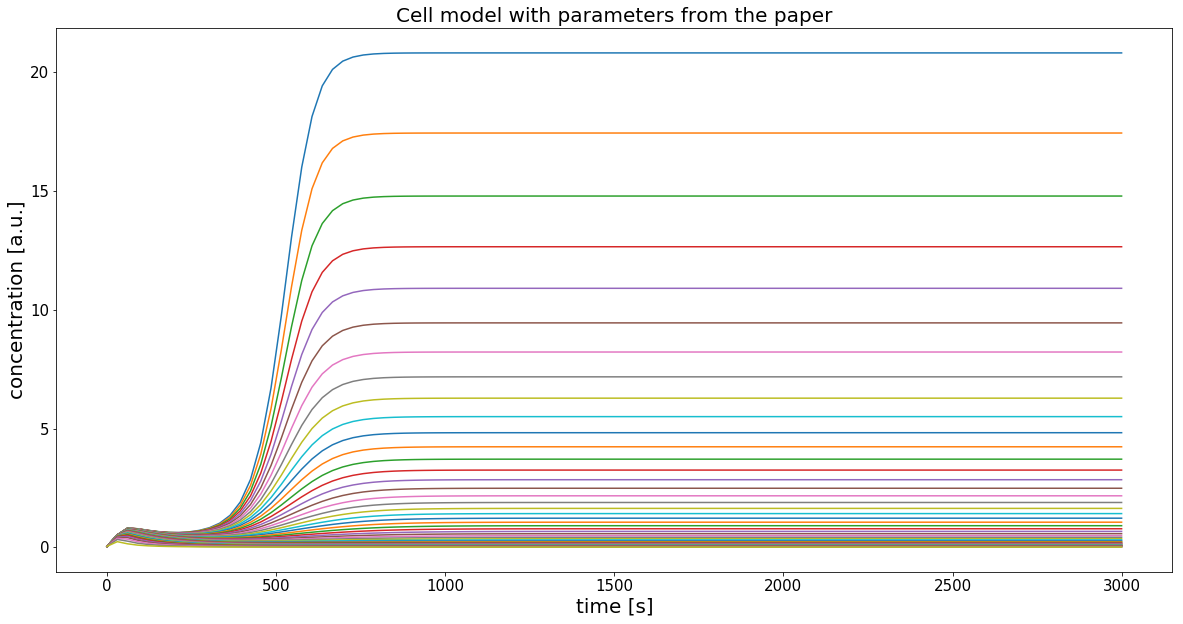

In [4]:
M = defaultParameters["M"]
prValues = []
valuesOneHundredTimeSteps, valuesLastTimeStep = [], []

for _ in np.linspace(0,1e8,49):
    M = M - 2000000
    m = WeisseBaseModel({'M': M})
    print(M)

    s = modelbase.Simulator(m)
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
    changedValuesOverTimeArray = s.timeCourse(np.linspace(0,3000,100),weise_values);
    valuesOneHundredTimeSteps.append(changedValuesOverTimeArray)
    valuesLastTimeStep.append(changedValuesOverTimeArray[-1])

newT = s.getT()[:100]

# Plotten Sie die zeitliche Entwicklung
plt.figure(figsize=(20,10))
plt.title('Cell model with parameters from the paper', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('concentration [a.u.]', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

for i, data in enumerate(valuesOneHundredTimeSteps):
    plt.plot(newT,valuesOneHundredTimeSteps[i][:,10], label = 'pr')
#plt.legend(loc = 'lower right',prop = {'size': 20})


plt.draw_if_interactive()
plt.show()


## Pr gegen steatdy

In [ ]:
y = np.linspace(0,1e8,49)
plt.figure(figsize=(20,10))
plt.title('Pr gegen Steady', size = 20)
plt.xlabel('growth rate', size = 20)
plt.ylabel('pr', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

prtest = []
for n, datan in enumerate(valuesLastTimeStep[0]): 
    prtest.append([valuesLastTimeStep[i][n]for i, data in enumerate(valuesLastTimeStep)])

#prlast = []
#for i, data in enumerate(valuesLastTimeStep):
#    prlast.append(valuesLastTimeStep [i][10])
    
for i, data in enumerate(prtest):
    plt.plot(prtest[9],y, label = 'pr')


plt.draw_if_interactive()

plt.show()

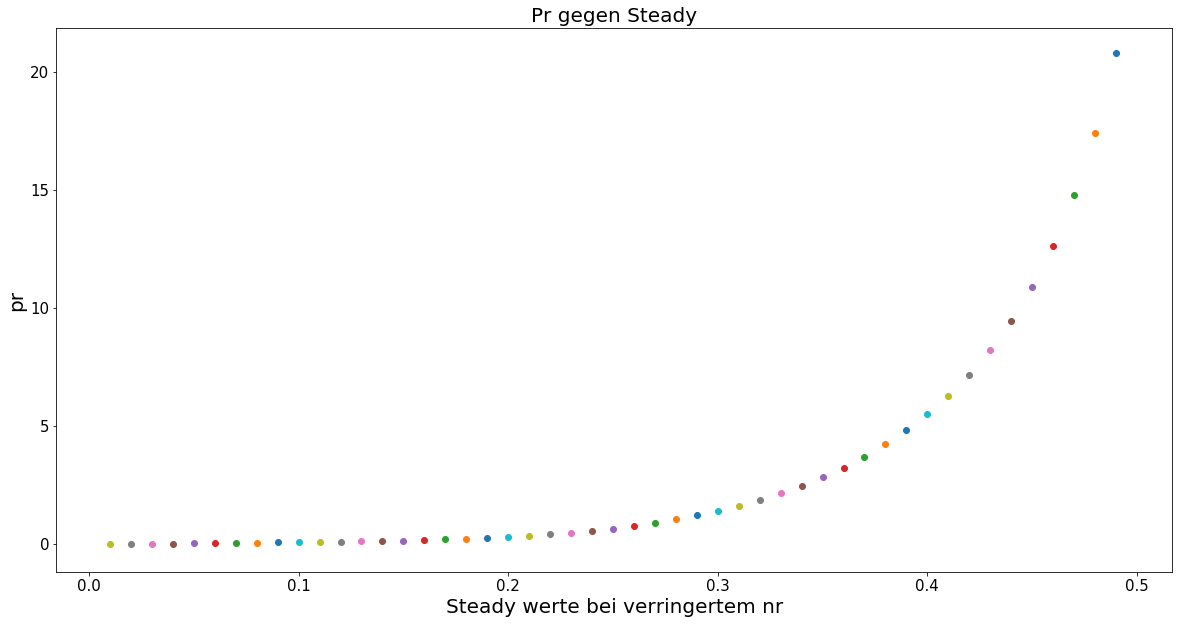

In [5]:
plt.figure(figsize=(20,10))
plt.title('Pr gegen Steady', size = 20)
plt.xlabel('Steady werte bei verringertem nr', size = 20)
plt.ylabel('pr', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)


#for i, j in zip(gesamtdurchlaufindex, zeitdurchlaufindex):
for i, data in enumerate(valuesOneHundredTimeSteps):
    plt.scatter(verringerungen[i],valuesLastTimeStep[i][10])


plt.draw_if_interactive()
plt.show()

# Subplots zu allen cl

(0, 2000)

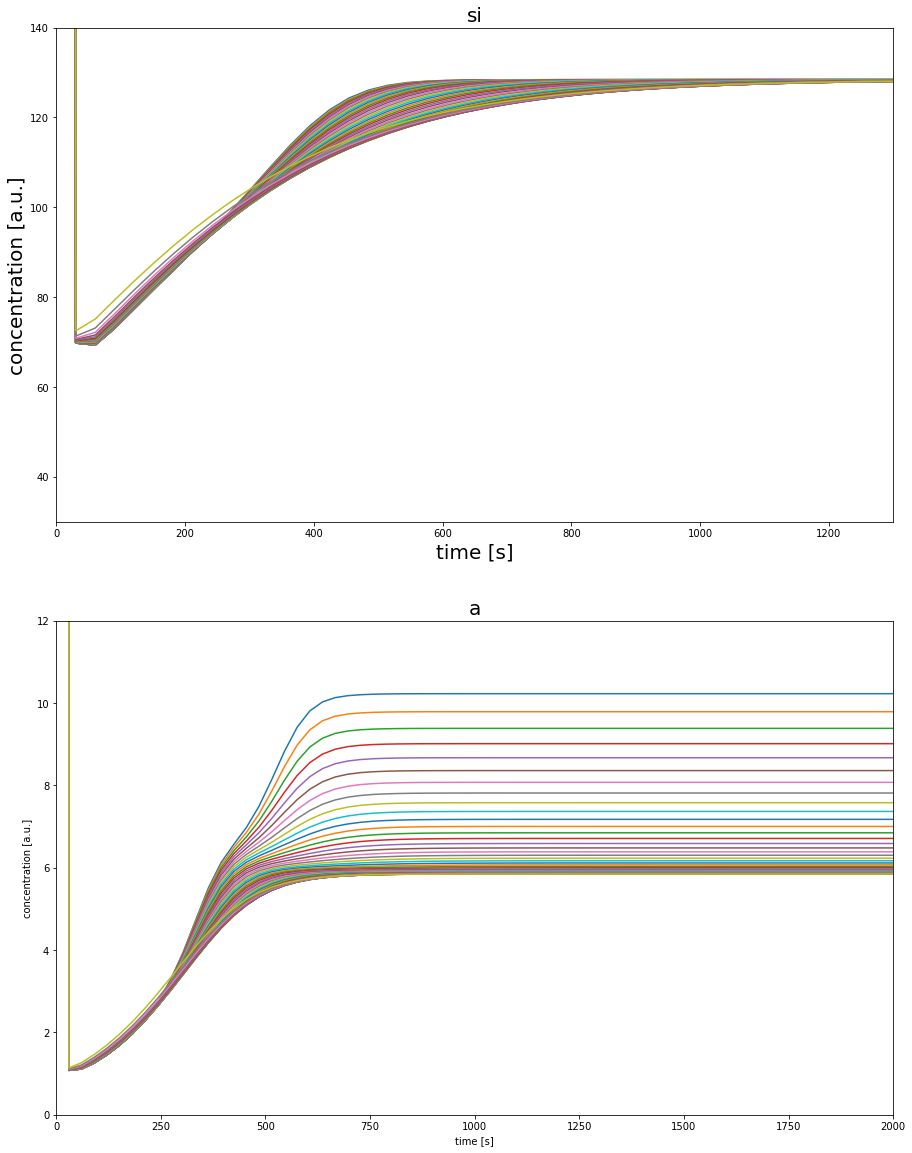

In [6]:
fig, Plotlist = plt.subplots(2,1,figsize=(15,20))
Plotlist = Plotlist.ravel()
for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT,valuesOneHundredTimeSteps[i][:,0])#, label = cl[0])

Plotlist[0].set_title('si', size ='20')
Plotlist[0].set_xlabel('time [s]',size ='20')
Plotlist[0].set_ylabel('concentration [a.u.]', size ='20')
Plotlist[0].set_ylim(30,140)
Plotlist[0].set_xlim(0,1300)
#Plotlist[0].legend(loc = 'lower right')

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,1])
Plotlist[1].set_title('a',size ='20')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].set_ylim(0,12)
Plotlist[1].set_xlim(0,2000) #nach 3000 keine Werte mehr

(0, 1750)

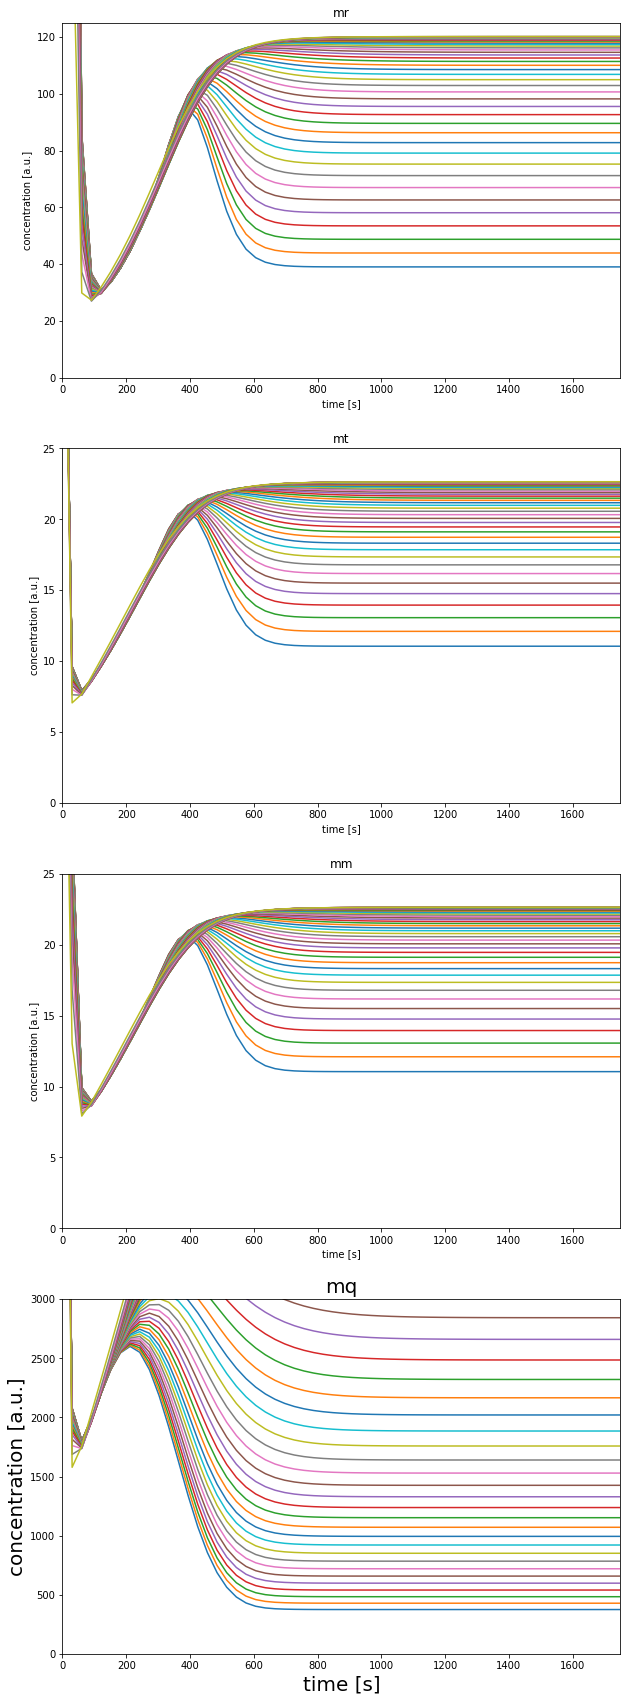

In [7]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,30))
Plotlist = Plotlist.ravel()
for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT,valuesOneHundredTimeSteps[i][:,2])#,label = '{0} für einen ns von {1}'.format(cl[2],i[0]))
Plotlist[0].set_title('mr')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].set_ylim(0,125)
Plotlist[0].set_xlim(0,1750)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,3])
Plotlist[1].set_title('mt')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].set_ylim(0,25)
Plotlist[1].set_xlim(0,1750)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[2].plot(newT,valuesOneHundredTimeSteps[i][:,4])
Plotlist[2].set_title('mm')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].set_ylim(0,25)
Plotlist[2].set_xlim(0,1750)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[3].plot(newT,valuesOneHundredTimeSteps[i][:,5])
Plotlist[3].set_title('mq', size ='20')
Plotlist[3].set_xlabel('time [s]', size ='20')
Plotlist[3].set_ylabel('concentration [a.u.]', size ='20')
Plotlist[3].set_ylim(0,3000)
Plotlist[3].set_xlim(0,1750)

(0, 2000)

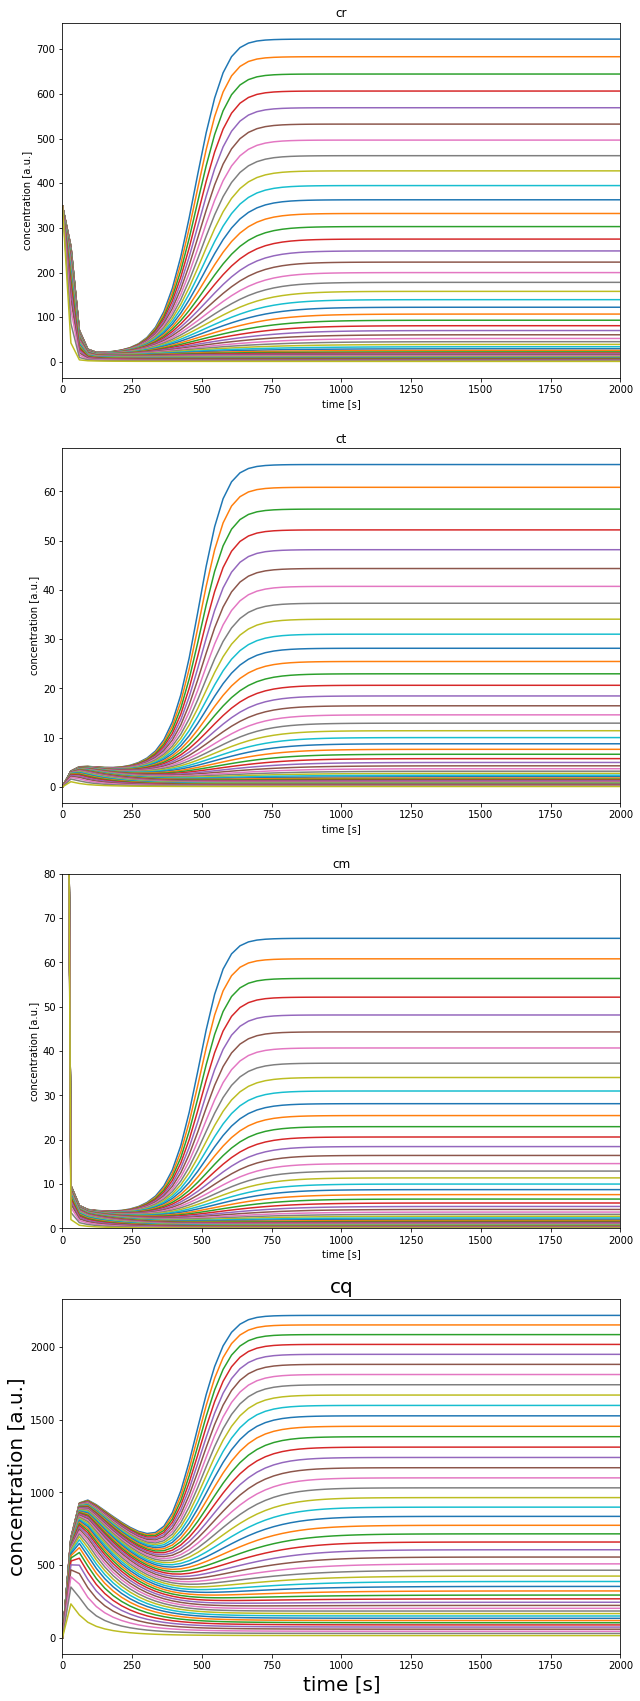

In [8]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,30))
Plotlist = Plotlist.ravel()

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT,valuesOneHundredTimeSteps[i][:,6])
Plotlist[0].set_title('cr')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
#Plotlist[0].set_ylim(0,900)
Plotlist[0].set_xlim(0,2000)


for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,7])
Plotlist[1].set_title('ct')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
#Plotlist[1].set_ylim(0,80)
Plotlist[1].set_xlim(0,2000)

                                                       
for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[2].plot(newT,valuesOneHundredTimeSteps[i][:,8])
Plotlist[2].set_title('cm')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].set_ylim(0,80)
Plotlist[2].set_xlim(0,2000)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[3].plot(newT,valuesOneHundredTimeSteps[i][:,9])
Plotlist[3].set_title('cq', size ='20')
Plotlist[3].set_xlabel('time [s]', size ='20')
Plotlist[3].set_ylabel('concentration [a.u.]',size ='20')
#Plotlist[3].set_ylim(0,2500)
Plotlist[3].set_xlim(0,2000)


(0, 2000)

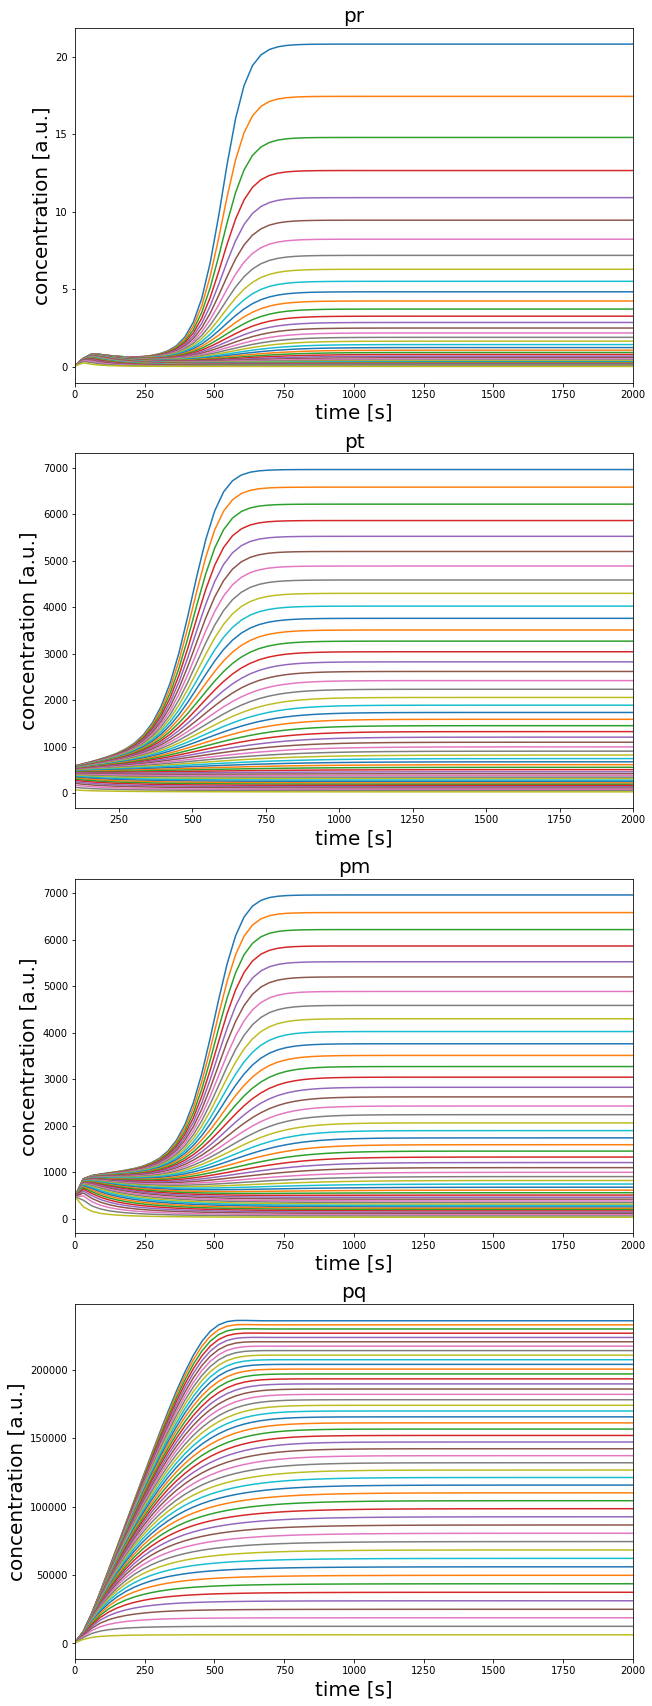

In [9]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,30))
Plotlist = Plotlist.ravel()

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT,valuesOneHundredTimeSteps[i][:,10])

Plotlist[0].set_title('pr', size ='20')
Plotlist[0].set_xlabel('time [s]', size ='20')
Plotlist[0].set_ylabel('concentration [a.u.]', size ='20')
#Plotlist[0].set_ylim(0,2000)
Plotlist[0].set_xlim(0,2000)


for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,11])
Plotlist[1].set_title('pt', size ='20')
Plotlist[1].set_xlabel('time [s]', size ='20')
Plotlist[1].set_ylabel('concentration [a.u.]', size ='20')
#Plotlist[1].set_ylim(0,2000)
Plotlist[1].set_xlim(100,2000)


for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[2].plot(newT,valuesOneHundredTimeSteps[i][:,12])
Plotlist[2].set_title('pm', size ='20')
Plotlist[2].set_xlabel('time [s]', size ='20')
Plotlist[2].set_ylabel('concentration [a.u.]', size ='20')
#Plotlist[2].set_ylim(0,2000)
Plotlist[2].set_xlim(0,2000)


for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[3].plot(newT,valuesOneHundredTimeSteps[i][:,13])
Plotlist[3].set_title('pq', size ='20')
Plotlist[3].set_xlabel('time [s]', size ='20')
Plotlist[3].set_ylabel('concentration [a.u.]', size ='20')
#Plotlist[3].set_ylim(0,5000)
Plotlist[3].set_xlim(0,2000)
